In [1]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telecom-churn/telecom_churn.csv


In [2]:
df=pd.read_csv("/kaggle/input/telecom-churn/telecom_churn.csv")


In [3]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [4]:
df[ 'Churn' ].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [5]:
#pre -process the data 
#1. Missing values
#2. Outlier detection

In [6]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [7]:
import seaborn as cat

<AxesSubplot:xlabel='CustServCalls', ylabel='MonthlyCharge'>

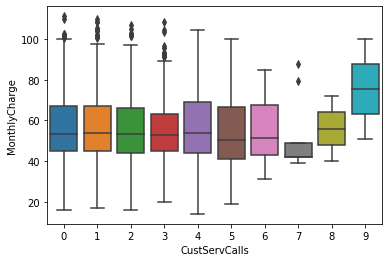

In [8]:
cat.boxplot(x='CustServCalls', y='MonthlyCharge', data=df)

<AxesSubplot:ylabel='MonthlyCharge'>

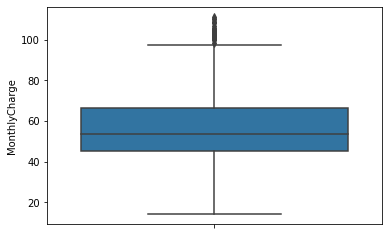

In [9]:
cat.boxplot( y = 'MonthlyCharge', data=df)

In [10]:
q1=df['MonthlyCharge'].quantile(0.25) 
print(q1)

45.0


In [11]:
q3=df['MonthlyCharge'].quantile(0.75) 
print(q3)

66.2


In [12]:
iqr= q3-q1

In [13]:
df_new=df[(df['MonthlyCharge']>=q1-1.5*iqr) & (df['MonthlyCharge']<=q3+1.5*iqr)]

<AxesSubplot:ylabel='MonthlyCharge'>

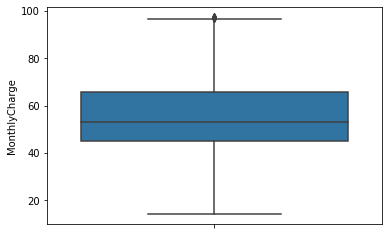

In [14]:
cat.boxplot(y='MonthlyCharge', data=df_new)

<AxesSubplot:xlabel='CustServCalls', ylabel='MonthlyCharge'>

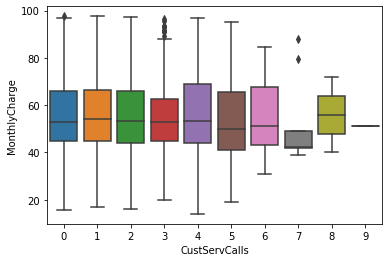

In [15]:
cat.boxplot(x='CustServCalls', y='MonthlyCharge', data=df_new)

<AxesSubplot:xlabel='CustServCalls', ylabel='OverageFee'>

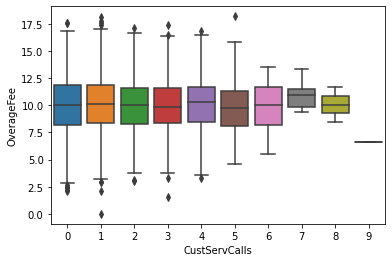

In [16]:
cat.boxplot(x='CustServCalls', y='OverageFee', data=df_new)

<AxesSubplot:xlabel='Churn', ylabel='CustServCalls'>

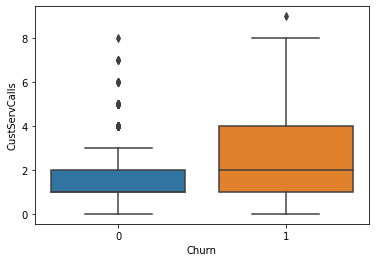

In [17]:
cat.boxplot(x='Churn' ,y='CustServCalls', data=df_new)

<AxesSubplot:xlabel='MonthlyCharge', ylabel='OverageFee'>

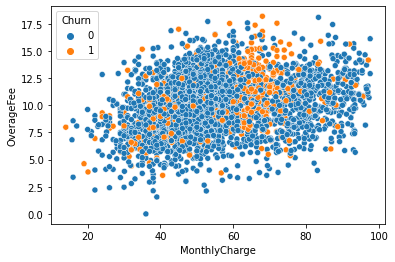

In [18]:
cat.scatterplot(x='MonthlyCharge', y='OverageFee', hue='Churn', data=df_new)